In [3]:
from scipy.optimize import fsolve
from matplotlib import pyplot as plt
import numpy as np
from scipy.integrate import odeint
%matplotlib inline

In [6]:
"""Q1 a)"""

A = (pi/4)*0.085**2
G = (40/60)*30/1000/A
E = 0.4
Po = 5*101.325*1000
dp = 0.003
mu = 2e-5
FT = 40 #mol/mi
FAo = FT*0.33
FBo = 0.67*FT
k = 0.05
rhoA = (Po/1000)*30/(8.314*(273.15+170))
rhoB = 1000
K = (1/(rhoB*A))*(-G/(rhoA*dp))*((1-E)/(E**3))*(150*mu*(1-E)/dp + 1.75*G)

def PBR(F,t):
    FA, FB, FC, P = F
    Ftot = (FA + FB + FC)
    ra = -k*(FB/Ftot)*P/(101.325*1000)
    rb = 2*ra
    rc = -ra
    dpdw = K*(Po*Ftot)/(P*FT)
    return (ra,rb,rc,dpdw)

wspan = linspace(0,100,1000)
F = odeint(PBR,[FAo,FBo,0,Po],wspan)
Fa = F[:,0]
P = F[:,3]
X = (FAo- Fa)/FAo
W = interp(0.5,X,wspan)
Pf = interp(0.5,X,P)
print ('W = ' +str(W))
print ('P = ' +str(Pf/(1000*101.325)))
plt.plot(wspan,F[:,3])
plt.show()
plt.plot(wspan,X)
plt.show()

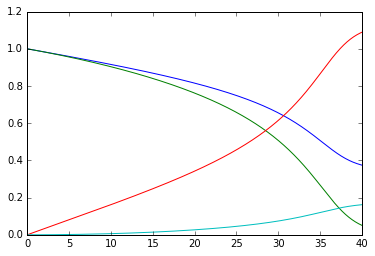

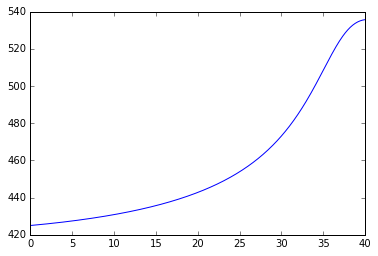

In [46]:
"""Q3"""
V = 40 #l
Q = 10
FAo = 1*Q
FBo = 1*Q
Ua = 10
Tu = 320
To = 425
CP = 30
CpD = 90
Hrxa = 14786
Hrxb = 6360
def func(Hrxa):

    def PBR(F,t):
        FA, FB, FC, FD, T = F
        rc = 0.043*np.exp(-9000*(1/T - 1/400))*(FA/Q)*(FB/Q)
        rd = 0.4*np.exp(-4790*(1/T - 1/500))*(FB/Q)*(FC/Q)
        dFAdV = -rc/2
        dFBdv = -rc/2 - 2*rd
        dFCdV = rc - rd
        dFDdV = rd
        dTdV = (Ua*(Tu - T) + 0.5*rc*Hrxa + 2*rd*Hrxb)/(FAo*CP + FBo*CP)
    #     print (dTdV)
    #     dTdV = 1.4
        return (dFAdV,dFBdv,dFCdV,dFDdV,dTdV)

    Vspan = np.linspace(0,34,34*10.1)
    F = odeint(PBR,[FAo,FBo,0,0,To],Vspan)
    Fa = F[:,0]
    Temp = F[:,4]
    return Temp[-1] - 500

Hrx = fsolve(func,14500)

V = 40 #l
Q = 10
FAo = 1*Q
FBo = 1*Q
Ua = 10
Tu = 320
To = 425
CP = 30
CpD = 90
Hrxa = Hrx[0] 
Hrxb = 6360

def PBR(F,t):
    FA, FB, FC, FD, T = F
    rc = 0.043*np.exp(-9000*(1/T - 1/400))*(FA/Q)*(FB/Q)
    rd = 0.4*np.exp(-4790*(1/T - 1/500))*(FB/Q)*(FC/Q)
    dFAdV = -rc/2
    dFBdv = -rc/2 - 2*rd
    dFCdV = rc - rd
    dFDdV = rd
    dTdV = (Ua*(Tu - T) + 0.5*rc*Hrxa + 2*rd*Hrxb)/(FAo*CP + FBo*CP)
    return (dFAdV,dFBdv,dFCdV,dFDdV,dTdV)

Vspan = np.linspace(0,V,V*10.1)
F = odeint(PBR,[FAo,FBo,0,0,To],Vspan)
Fa = F[:,0]
Fb = F[:,1]
Temp = F[:,4]
plt.plot(Vspan,F[:,:4]/Q)
plt.show()
plt.plot(Vspan,Temp)
plt.show()

In [ ]:
V = 40 #l
Q = 10
FAo = 1*Q
FBo = 1*Q
Ua = 10
Tu = 320
To = 425
CP = 30
CpD = 90
Hrxa = Hrx[0] 
Hrxb = 6360

def PBR(F,t):
    FA, FB, FC, FD, T = F
    rc = 0.043*np.exp(-9000*(1/T - 1/400))*(FA/Q)*(FB/Q)
    rd = 0.4*np.exp(-4790*(1/T - 1/500))*(FB/Q)*(FC/Q)
    dFAdV = -rc/2
    dFBdv = -rc/2 - 2*rd
    dFCdV = rc - rd
    dFDdV = rd
    dTdV = (Ua*(Tu - T) + 0.5*rc*Hrxa + 2*rd*Hrxb)/(FAo*CP + FBo*CP)
    return (dFAdV,dFBdv,dFCdV,dFDdV,dTdV)

Vspan = np.linspace(0,V,V*10.1)
F = odeint(PBR,[FAo,FBo,0,0,To],Vspan)
Fa = F[:,0]
Fb = F[:,1]
Temp = F[:,4]
plt.plot(Vspan,F[:,:4]/Q)
plt.show()
plt.plot(Vspan,Temp)
plt.show()